In [1]:
import numpy 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1639039171078515072
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14311230684395873901
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

Training Dataset: This contains 60,000 data points.
Testing Dataset: This contains 10,000 data points.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Plotting Images in grey scale

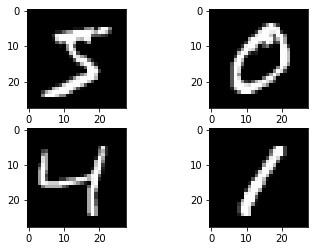

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

# Formatting Data and Labels for Keras
Now, we will flatten our array of images into a vector of 28×28=784 numbers. As long as we’re consistent between images, it is irrespective of how we flatten the array. From this perspective, the images of the given dataset are just a bunch of points in a 784-dimensional vector space. But the data should always be of the format “(Number of data points, data point dimension)”. In this example, the training data will be of the dimension 60,000×784.

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255 
X_test = X_test / 255
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


# Single layer Neural Network Model
Here we will define a single-layer neural network. It will have an input layer of 784 neurons, i.e. the input dimension and output layer of 10 neurons, i.e. a number of classes. The activation function used will be softmax activation.

In [8]:
# create model
model = Sequential()  
model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))

# Compiling the Model
Once we defined our first model, our next step is to compile it. While compiling we have to give the loss function to be used, the optimizer, and any metric as an input. Here we will use

Cross-entropy loss as a loss function,
SGD as an optimizer, and
Accuracy as a metric.

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training or Fitting the Model
After compilation, our model is ready to be trained. Now, we will provide training data to the neural network. Also, we have to specify the validation data, over which the model will only be validated along with the number of epochs and batch size as hyperparameter

In [10]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 3s 4ms/step - loss: 1.4758 - accuracy: 0.6310 - val_loss: 0.9938 - val_accuracy: 0.8013
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8627 - accuracy: 0.8189 - val_loss: 0.7288 - val_accuracy: 0.8441
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.8434 - val_loss: 0.6193 - val_accuracy: 0.8592
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6092 - accuracy: 0.8559 - val_loss: 0.5572 - val_accuracy: 0.8684
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5587 - accuracy: 0.8633 - val_loss: 0.5169 - val_accuracy: 0.8745
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.8687 - val_loss: 0.4879 - val_accuracy: 0.8793
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4987 - accuracy: 0.8729 - val_loss: 0.4663 - val_accuracy: 0.8830
Epoch 

# Evaluating the Model

In [11]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.8883
Baseline Error: 11.17%


# Multi-Layer Neural Network Model
Now we will define a multi-layer neural network in which we will add 2 hidden layers having 500 and 100 neurons.

In [12]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compiling the Model
Once we defined our second model, our next step is to compile it. While compiling we have to give the loss function to be used, the optimizer, and any metric as an input. Here we will use

Cross-entropy loss as a loss function,
Adam optimizer as an optimizer, and
Accuracy as a metric.

In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2670 - accuracy: 0.9225 - val_loss: 0.1241 - val_accuracy: 0.9617
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1017 - accuracy: 0.9699 - val_loss: 0.0887 - val_accuracy: 0.9730
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0795 - val_accuracy: 0.9753
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0810 - val_accuracy: 0.9736
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0683 - val_accuracy: 0.9794
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0740 - val_accuracy: 0.9777
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0635 - val_accuracy: 0.9818
Epoch 

In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.9801
Baseline Error: 1.99%


# Deep Neural Network Model
Now we will define a deep neural network in which we will add 3 hidden layers having 500, 100 and 50 neurons respectively

In [16]:
model = Sequential()  
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 1.0054 - accuracy: 0.7495 - val_loss: 0.3903 - val_accuracy: 0.9082
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2918 - accuracy: 0.9251 - val_loss: 0.2132 - val_accuracy: 0.9408
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1877 - accuracy: 0.9486 - val_loss: 0.1635 - val_accuracy: 0.9532
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1410 - accuracy: 0.9607 - val_loss: 0.1319 - val_accuracy: 0.9634
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1104 - accuracy: 0.9689 - val_loss: 0.1109 - val_accuracy: 0.9667
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.9744 - val_loss: 0.0969 - val_accuracy: 0.9706
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.0903 - val_accuracy: 0.9716
Epoch 

In [19]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9751
Baseline Error: 2.49%


# Analyzing Model Summary

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
_________________________________________________________________


# Save the Model
The phrase "Saving a TensorFlow model" typically means one of two things:

Checkpoints, OR
SavedModel.
Checkpoints capture the exact value of all parameters (tf.Variable objects) used by a model. Checkpoints do not contain any description of the computation defined by the model and thus are typically only useful when source code that will use the saved parameter values is available.

The SavedModel format on the other hand includes a serialized description of the computation defined by the model in addition to the parameter values (checkpoint). Models in this format are independent of the source code that created the model. They are thus suitable for deployment via TensorFlow Serving, TensorFlow Lite, TensorFlow.js, or programs in other programming languages (the C, C++, Java, Go, Rust, C# etc. TensorFlow APIs)

In [21]:
import h5py
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
model.save_weights('FC.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0344 - accuracy: 0.9907 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0713 - val_accuracy: 0.9799
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.0680 - val_accuracy: 0.9809
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.0697 - val_accuracy: 0.9808
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.0717 - val_accuracy: 0.9815
Epoch 

# Loading the saved Model
Now, we will load the model which we have just saved and compare that with the random model. Here firstly we have created a random model and then load the previously saved model and compare the error of both.

In [22]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.6765 - accuracy: 0.0982
Baseline Error: 90.18%


In [23]:
model.load_weights('FC.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9831
Baseline Error: 1.69%


# Creating checkpoints of Model
Here we make the model checkpoints (i.e, point after that there is no significant reduction in the validation error) and saved the weights of that point and used further wherever required.

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath='FC.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=callbacks_list)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0796 - val_accuracy: 0.9805
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0851 - val_accuracy: 0.9802
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0916 - val_accuracy: 0.9779
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0745 - val_accuracy: 0.9830
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0748 - val_accuracy: 0.9831
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0785 - val_accuracy: 0.9827
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0874 - val_accuracy: 0.9807
Epoch 

# Defining Learning Rate Decay and Other Parameters of Optimizer
We will use the SGD and Adam Optimizer for our model. 

In [25]:
from tensorflow.keras.optimizers import SGD, Adam
sgd = SGD(lr = 0.001, momentum = 0.0005, decay = 0.0005)   # 0.001  to 0.000001
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0901 - val_accuracy: 0.9822
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0880 - val_accuracy: 0.9812
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 8.4430e-04 - accuracy: 0.9998 - val_loss: 0.0848 - val_accuracy: 0.9843
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 1.9536e-04 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9837
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 1.2123e-04 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9835
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 1.0362e-04 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9843
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 9.4113e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_acc

# Defining Regularizers for the Model

In [26]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
model = Sequential() 
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.25))
model.add(Dense(50, activation = 'sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 1.4037 - accuracy: 0.5977 - val_loss: 0.6262 - val_accuracy: 0.8840
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.6454 - accuracy: 0.8696 - val_loss: 0.4393 - val_accuracy: 0.9219
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.5242 - accuracy: 0.8999 - val_loss: 0.3833 - val_accuracy: 0.9339
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4698 - accuracy: 0.9152 - val_loss: 0.3540 - val_accuracy: 0.9442
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4358 - accuracy: 0.9251 - val_loss: 0.3289 - val_accuracy: 0.9488
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4200 - accuracy: 0.9280 - val_loss: 0.3195 - val_accuracy: 0.9537
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4018 - accuracy: 0.9337 - val_loss: 0.3107 - val_accuracy: 0.9549
Epoch 

# Defining Initialization for the Model
Add dropout regularization and glorot weight initialization technique in the model

In [27]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(100, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializers.GlorotNormal()))
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 1.0140 - accuracy: 0.7363 - val_loss: 0.3820 - val_accuracy: 0.9127
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2892 - accuracy: 0.9256 - val_loss: 0.2257 - val_accuracy: 0.9374
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1928 - accuracy: 0.9477 - val_loss: 0.1687 - val_accuracy: 0.9517
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1444 - accuracy: 0.9603 - val_loss: 0.1357 - val_accuracy: 0.9615
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1134 - accuracy: 0.9685 - val_loss: 0.1124 - val_accuracy: 0.9676
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0914 - accuracy: 0.9743 - val_loss: 0.0982 - val_accuracy: 0.9705
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9794 - val_loss: 0.0913 - val_accuracy: 0.9734
Epoch 